In [205]:
import pandas as pd
import sklearn
import numpy as np
from sklearn.preprocessing import normalize

df = pd.read_csv (r'C:\Users\walla\OneDrive\Área de Trabalho\Machine\Output_rev2.csv', sep=';', decimal=',')
df = df.apply(pd.to_numeric)
df=(df-df.min())/(df.max()-df.min())
df
#df.max()
#df.info()
#print(df.iloc[:, 0:5])

,Nivel,Vazao,Precp1,Precp2,Precp3,Precp4,Precp5,Precp6,Precp7,Precp8,...,Temp2,Temp3,Temp4,Temp5,Temp6,Temp7,Temp8,Temp9,Temp10,Temp11
0,0.397174,0.192374,0.197741,0.124062,0.116541,0.123153,0.124370,0.118947,0.263617,0.176799,...,0.759366,0.749153,0.747343,0.742954,0.740697,0.774407,0.756769,0.686207,0.690922,0.738464
1,0.401884,0.254903,0.261558,0.126772,0.198360,0.214379,0.192657,0.159436,0.381469,0.360792,...,0.710564,0.723579,0.716293,0.711959,0.705130,0.726481,0.713430,0.635325,0.649074,0.696953
2,0.405547,0.230485,0.341031,0.298735,0.349977,0.332035,0.284684,0.235061,0.247874,0.331467,...,0.670993,0.661868,0.658918,0.658672,0.658047,0.682172,0.667319,0.620433,0.627242,0.656611
3,0.411826,0.295752,0.302835,0.267419,0.219359,0.224992,0.195653,0.201898,0.124444,0.117107,...,0.716122,0.714413,0.716450,0.719421,0.719838,0.721827,0.714015,0.667856,0.663874,0.713553
4,0.419676,0.335460,0.101276,0.109907,0.009217,0.023810,0.028159,0.034532,0.129785,0.074377,...,0.745976,0.750601,0.749573,0.746551,0.744048,0.754270,0.743422,0.704081,0.698122,0.741475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,0.832548,0.241236,0.018069,0.078160,0.000150,0.001735,0.005194,0.022866,0.000000,0.000000,...,0.601441,0.582047,0.586211,0.594380,0.603068,0.562386,0.578487,0.608454,0.639599,0.601565
2145,0.828885,0.231955,0.044650,0.036969,0.056664,0.066297,0.062356,0.060770,0.052074,0.055870,...,0.633587,0.627733,0.632108,0.636114,0.638124,0.614862,0.623610,0.629506,0.626009,0.636804
2146,0.826792,0.203550,0.242383,0.373264,0.153541,0.143117,0.129313,0.141008,0.104496,0.140760,...,0.647308,0.654912,0.657157,0.659645,0.659341,0.639850,0.644325,0.605392,0.602896,0.651889
2147,0.825746,0.250010,0.501212,0.564267,0.516663,0.502554,0.481969,0.455388,0.461083,0.491897,...,0.644499,0.650869,0.648987,0.647941,0.642154,0.647945,0.641927,0.623699,0.610214,0.630555


In [206]:
from sklearn import svm
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 0:43], df.iloc[:, 44], test_size=0.3)
X_train2, X_test2, y_train2, y_test2 = train_test_split(df.iloc[:, 0:43], df.iloc[:, 45], test_size=0.3)

In [207]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
#from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import cross_val_score

#from sklearn.metrics import mean_absolute_percentage_error

#explained_variance_score(y_pred, y_test, multioutput='raw_values')
#max_error(y_pred, y_test)
#mean_absolute_error(y_pred, y_test)
#mean_squared_error(y_pred, y_test)
#mean_squared_log_error(y_pred, y_test)
#mean_absolute_percentage_error(y_pred, y_test)

regr = svm.SVR(kernel='rbf', degree=3, gamma='auto', coef0=0.0, tol=0.001, C=3, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=- 1)
regr.fit(X_train, y_train)
cross_val_score(regr, df.iloc[:, 0:43], df.iloc[:, 44], cv=10, scoring='neg_mean_squared_error')


array([-0.00107486, -0.00112768, -0.00173246, -0.00180607, -0.00100311,
       -0.00111854, -0.00177344, -0.00219736, -0.00300095, -0.00170123])

In [208]:
results = pd.DataFrame(index=np.arange(10), columns=np.arange(10))
results2 = pd.DataFrame(index=np.arange(10), columns=np.arange(10))

j = 0

for i in np.arange(1, 11, 1):
    regr = svm.SVR(kernel='rbf', degree=3, gamma='auto', coef0=0.0, tol=0.001, C=i, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=- 1)
    regr.fit(X_train, y_train)
    results[j] = cross_val_score(regr, df.iloc[:, 0:43], df.iloc[:, 44], cv=10, scoring='neg_mean_squared_error')

    regr2 = svm.SVR(kernel='rbf', degree=3, gamma='auto', coef0=0.0, tol=0.001, C=i, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=- 1)
    regr2.fit(X_train2, y_train2)
    results2[j] = cross_val_score(regr2, df.iloc[:, 0:43], df.iloc[:, 45], cv=10, scoring='neg_mean_squared_error')
    j = j+1
    
results = results*-1
results2 = results2*-1

results.columns = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
results2.columns = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

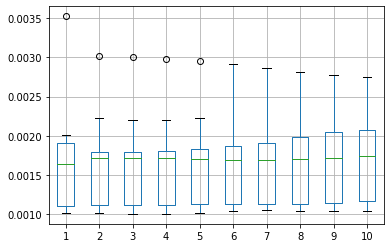

In [209]:
boxplot = results.boxplot() #Nivel

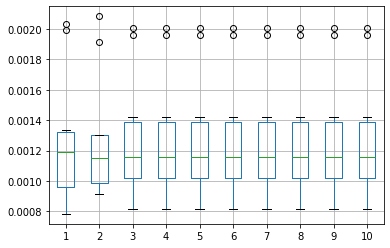

In [210]:
boxplot = results2.boxplot() #Vazao

In [219]:
resultsx = np.zeros(1000)
resultsx2 = np.zeros(1000)
j = 0

for i in np.arange(1, 15, 1):
    regr = svm.SVR(kernel='rbf', degree=3, gamma='auto', coef0=0.0, tol=0.001, C=i, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=- 1)
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    temp = mean_squared_error(y_pred, y_test)
    resultsx[j]= temp

    regr = svm.SVR(kernel='rbf', degree=3, gamma='auto', coef0=0.0, tol=0.001, C=i, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=- 1)
    regr.fit(X_train2, y_train2)
    y_pred2 = regr.predict(X_test2)
    temp2 = mean_squared_error(y_pred2, y_test2)
    resultsx2[j]= temp2
    
    j = j+1

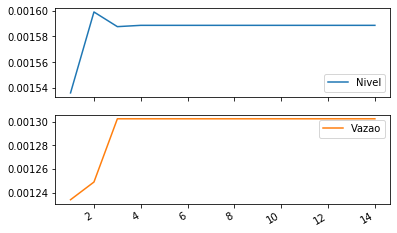

In [220]:
resultsx = resultsx[resultsx != 0]
resultsx2 = resultsx2[resultsx2 != 0]

d = pd.DataFrame({'Nivel': resultsx, 'Vazao': resultsx2}, 
                  index=np.arange(1, 15, 1))
lines = d.plot.line(subplots=True)

In [221]:
from sklearn.ensemble import RandomForestRegressor

results3 = np.zeros(1000)
results4 = np.zeros(1000)
j = 0

for i in np.arange(1, 100, 5):
    regr = RandomForestRegressor(max_depth=i, random_state=0)
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    
    temp = mean_squared_error(y_pred, y_test2)
    results3[j]= temp
    
    regr = RandomForestRegressor(max_depth=i, random_state=0)
    regr.fit(X_train2, y_train2)
    y_pred2 = regr.predict(X_test)

    temp2 = mean_squared_error(y_pred2, y_test2)
    results4[j]= temp2
    
    j = j+1

C:\Users\walla\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\walla\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\walla\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\walla\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\walla\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

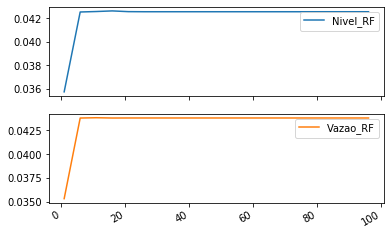

In [222]:
results3 = results3[results3 != 0]
results4 = results4[results4 != 0]

results3

df = pd.DataFrame({'Nivel_RF': results3, 'Vazao_RF': results4}, 
                  index=np.arange(1, 100, 5))
lines = df.plot.line(subplots=True)